- inside the pipeline function
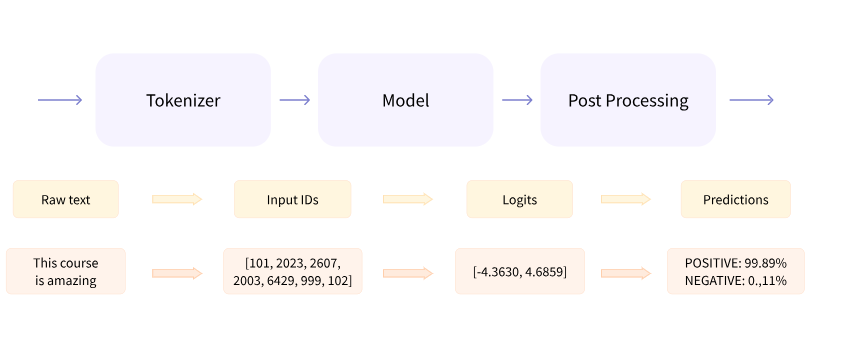

## Tokenizer
- splitting text into words, subwords, or symbols (token)
- converting tokens to an integer
- add additional inputs that may be useful for the model

- `AutoTokenizer` Class
- `from_pretrained()` method

- transformer models excepts tensors as input

In [7]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]

inputs = tokenizer(
    raw_inputs, 
    padding=True, 
    truncation=True, 
    return_tensors='tf'
)

print(inputs)

{'input_ids': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662,
        12172,  2607,  2026,  2878,  2166,  1012,   102],
       [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,
            0,     0,     0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>}


In [9]:
from transformers import TFAutoModel

model = TFAutoModel.from_pretrained(checkpoint)

outputs = model(inputs)
print(outputs.last_hidden_state.shape)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


(2, 16, 768)


- output size
    - batch_size x sequence_lenght x hidden_size
    - batch size: The number of sequences processed at a time (2 in our example).
    - sequence length: The length of the numerical representation of the sequence (16 in our example).
    - hidden size: The vector dimension of each model input.
    
## Model Heads
- what the model has to do
- base model + model head -> produce the result
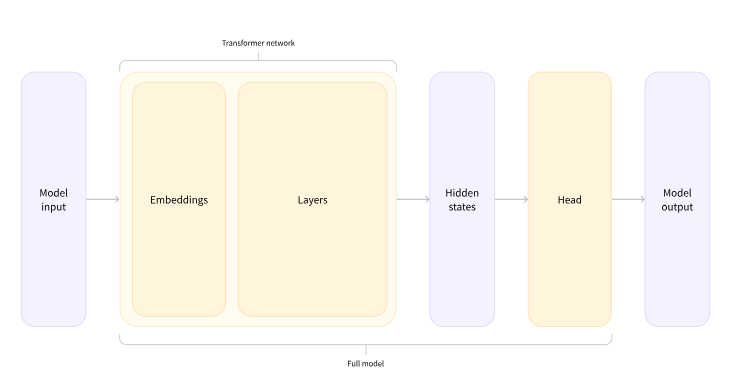
- different architecture (model head) are build for different task
- some of them are
    - *Model (retrieve the hidden states)
    - *ForCausalLM
    - *ForMaskedLM
    - *ForMultipleChoice
    - *ForQuestionAnswering
    - *ForSequenceClassification
    - *ForTokenClassification

In [10]:
from transformers import TFAutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(inputs)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [11]:
print(outputs.logits.shape)

(2, 2)


## post processing output
- the output may not make sense

In [16]:
print(outputs)
# the outputs are not probabilites but logits
# we need to use softmax to convert them to probabilities

import tensorflow as tf
predictions = tf.math.softmax(outputs.logits, axis=1)
print(predictions)

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.5606977,  1.6122825],
       [ 4.1692314, -3.3464472]], dtype=float32)>, hidden_states=None, attentions=None)
tf.Tensor(
[[4.0195279e-02 9.5980471e-01]
 [9.9945587e-01 5.4418424e-04]], shape=(2, 2), dtype=float32)


In [17]:
# to know the labels
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}